## Aluno: Gustavo Gimpel Correia Lima
## Matrícula: `201512040488`

## Antes de começar...

Nessa prática, iremos entender melhor o conceito de Overfitting e underfitting além de ter o primeiro contato com um método de aprendizado de máquina supervisionado (Árvore de Decisão). Para isso, iremos usar a biblioteca [Scikit Learn](https://scikit-learn.org), além das bibliotecas que usamos na prática passada: pandas, matplotlib e numpy. Clique no código abaixo e pressione ctrl+enter para executá-lo.

Para isso, se necessário, instale tais bibliotecas usando `pip3 install pandas matplotlib numpy` (em alguns Sistemas Operacionais/configurações, você usará `pip` ao inves de `pip3`)

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt

### ...um pouquinho mais sobre 🐼🐼

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html">**Método drop**</a> Remove colunas ou linhas do dataframe. Utilize inplace=True para a modificação ocorrer no dataframe que está sendo modificado. Veja exemplo:

In [2]:
df = pd.DataFrame(np.arange(20).reshape(5, 4),columns=['ana', 'bruna', 'carol', 'daniel'])
print(df)
print("\n\n depois de remover... \n\n")
print(df.drop(['carol', 'daniel'], axis=1))

   ana  bruna  carol  daniel
0    0      1      2       3
1    4      5      6       7
2    8      9     10      11
3   12     13     14      15
4   16     17     18      19


 depois de remover... 


   ana  bruna
0    0      1
1    4      5
2    8      9
3   12     13
4   16     17


<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html">**Método sample**</a> Extrai uma amostra aleatória do Dataframe. Utilize random_state = "número inteiro" para que seja embaralhado sempre da mesma forma - importante para [reprodutibilidade dos resultados](https://pt.wikipedia.org/wiki/Reprodutibilidade). Além disso, você pode remover a amostra selecionada da amostra original por meio dos índices (precisam ser únicos).

In [3]:
df_sample = df.sample(frac=0.6, random_state=1)
df_sample

,ana,bruna,carol,daniel
2,8,9,10,11
1,4,5,6,7
4,16,17,18,19


Remoção da amostra selecionada:

In [4]:
df_retirando_sample = df.drop(df_sample.index)
df_retirando_sample

,ana,bruna,carol,daniel
0,0,1,2,3
3,12,13,14,15


## Overfitting - Exemplo Ilustrativo

A principio, vamos fazer um dataset artificial em que possuimos dois atributos (também chamado de caracteríscas ou, do inglês, *features*) e duas possíveis saídas (também chamado de valor alvo ou classe alvo). Para isso, temos a matriz `x` e o vetor `y` em que, para cada exemplo `i`, cada linha `x[i]` dessa matriz representa esse exemplo (neste caso, representado por dois atributos) e a classe alvo `y[i]`.

Veja o dataset:

In [5]:
np.random.seed(0)
x, y = sklearn.datasets.make_moons(400, noise=0.25)
x[:10]#10 primeiras linhas da matriz X

array([[-0.49511301,  0.96602758],
       [ 1.71424117, -0.49933902],
       [ 1.3702969 , -0.37944818],
       [-1.11477769,  0.16771336],
       [-0.13290417, -0.14821564],
       [ 0.62307375,  0.86983696],
       [-0.91762377,  0.58061579],
       [ 0.07292557, -0.44423885],
       [-0.74499852,  0.89696524],
       [-0.26472071,  0.47607795]])

In [6]:
y[:10]#lista com 10 primeiros itens do vetor y

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1])

Nessa e nas demais práticas, iremos representar a classe alvo como um vetor `y` e, os atributos, pela matriz `x`.

Abaixo, podemos ver a representação gráfica deste dataset em que, para cada instancia `i`, o eixo x é o atributo `x[i][0]` e o eixo y é o atributo `x[i][1]` a classe alvo `y[i]` é representada pela cor.

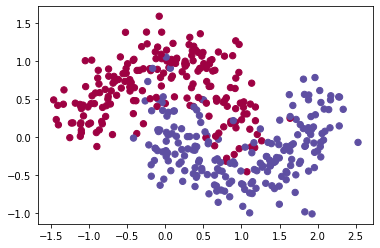

In [7]:
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)

Inicialmente, no aquivo `arvore_de_decisao.py` implemente a função `cria_modelo`. Veja a seguir as instruções de como implementá-la.

Nessa função, você deverá criar um modelo baseado em arvore de decisão, por meio de um treino. Para o treino, use a variável `x` (que pode ser uma matriz ou DataFrame) em que, cada linha, é uma instância representada pelos seus atributos, além disso, a `y` é um vetor ou Series  representando a classe alvo  de cada instância. Coloque como `random_state=1` que é o seed (semente) da função aleatória usada, pois, por padrão, a árvore de decisão do Scikit learn obtém os dados de forma aleátoria. Definindo este parametro, garantimos que o resultado será o mesmo em todas as execuções.

Além disso, com o objetivo de avaliarmos o overfitting, essa função possuirá o parametro `min_samples_split` que 
 que define o mínimo de exemplos necessários para que um nodo da árvore efetue a divisão. Use esse parâmetro ao instanciar a Árvore de Decisão. 

Para implementar essa função, use a classe `DecisionTreeClassifier`. [Veja a documentação desta classe](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Se necessário, comente a importação abaixo, copie e cole a função aqui e, logo após, volte ela para o arquivo. Para criar/obter o modelo use o [método fit](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit).  Após implementar, execute o teste abaixo.

In [8]:
!python3 -m tests TestDecisionTree.test_cria_modelo

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


Logo após, execute o código abaixo para importar a função criada. Lembre-se de reiniciar o kernel caso faça alguma modificação na mesma após importar.

In [9]:
from arvore_decisao import cria_modelo

Abaixo, crie um modelo e use a função `plot_decision_boudary` para gerar o grafico apresentado o dataset ilustrativo com a superfície de decisão do modelo criado. Essa função está no arquivo `util.py`.

Na criação do modelo, altere o parametro `min_samples` até um valor que você julgue adequado. Veja o *overfitting* em valores muito baixos (abaixo de 1%, principalmente) e *underfitting* em valores muito altos. Como usualmente implementada, a porcentagem nesta função é um valor entre 0 e 1 em que 1 representa 100% 0.5, por exemplo, representa 50%.

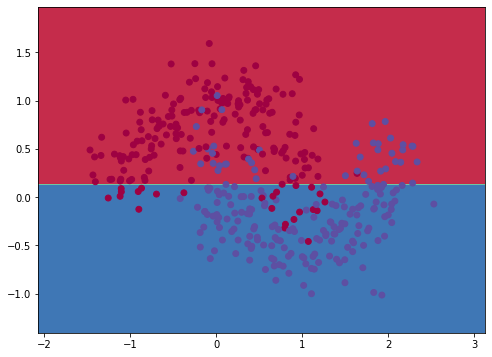

In [10]:
from util import plot_decision_boundary
modelo = cria_modelo(x,y,0.8);
plot_decision_boundary(modelo, x, y)


## Impacto do Overfitting/Underfitting - Estimativa Automática da Qualidade de Conteúdo

Nesta prática, iremos usar dados de 3.294 artigos da Wikipédia rotulados manualmente quanto a sua qualidade. 

Esses artigos passaram por uma avaliação pela comunidade de editores da Wikipedia. Tais editores classificaram esses artigos quanto a qualidade da seguinte forma: 

- **Artigo Destaque (FA)**: Os artigos atribuídos a esta classe são, de acordo com os avaliadores, os melhores artigos da Wikipédia.
- **Classe A (AC)**: os artigos da Classe A são considerados completos, mas com alguns problemas pendentes que precisam ser resolvidos para serem promovidos a Artigos em destaque.
- **Artigo Bons (GA)**: Bons Artigos são aqueles sem problemas de lacunas ou conteúdo excessivo. Essas são boas fontes de informação, embora outras enciclopédias possam fornecer um conteúdo melhor.
- **Classe B (BC)**: os artigos atribuídos a essa classe são considerados úteis para a maioria dos usuários, mas carecem de informações mais precisas.
- **Classe Inicial (ST)**: os artigos da Classe Inicial ainda estão incompletos, embora contenham referências e ponteiros para informações mais completas.
- **Artigos Rascunhos (SB)**: os artigos de toco são artigos de rascunho, com poucos parágrafos. Eles também têm poucas ou nenhumas citações.

Assim, [Dalip et. al. (2009)](https://dl.acm.org/citation.cfm?id=1555449) fizeram o preprocessamento desses artigos para serem extraídos indicadores de qualidades tais como: idade do artigo, tamanho, número de citações. Com tais indicadores e a classe de qualidade, foi possível realizar a predição automática de qualidade de artigos da Wikipédia.

Nesta prática, iremos fazer a previsão da qualidade usando os indicadores proposto por [Dalip et. al. (2009)](https://dl.acm.org/citation.cfm?id=1555449) e uma árvore de decisão.

Inicialmente, uso um DataFrame pandas e [leia o arquivo `wikipedia.csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) e exiba os dados deste dataset. Coloque como o rótulo da linha o id do artigo (ou seja, no dataset, a coluna `id` será a `index_col` do DataFrame).

In [11]:
dataFrame = pd.DataFrame(data=pd.read_csv(filepath_or_buffer='wikipedia.csv',index_col='id'))
dataFrame.sample(frac=0.6, random_state=1)

,realClass,\histAge,\histAgePerReview,\histReviewsPerUser,\histDiscussionCount,\histIPCount,\histReviewCount,\histUserCount,\histModifiedLinesRate,\histOccasionalUsersReviewsRate,...,\minAbsLen,\XLinksPerSec,\ssCount,\sCount,\numExtLink,\tamMaiorFrase,\avgSLen,\meanSubsectionPerSection,\LinksPerTLen,\avgPLen
id,,,,,,,,,,,,,,,,,,,,,
6322029,'GA',1211.0,1.29,3.56,100.0,165.0,692.0,527.0,27.76,22.69,...,1019.0,0.1429,3.0,7.0,1.0,227.0,3860.1428,0.4286,137.1624,233.5833
1465185,'GA',1760.0,6.48,3.00,15.0,19.0,94.0,75.0,11.22,28.72,...,1245.0,0.1667,1.0,6.0,1.0,146.0,1804.3333,0.1667,120.2889,226.0000
333380,'AC',2251.0,10.26,6.36,17.0,72.0,511.0,439.0,2.70,15.66,...,4778.0,6.8000,4.0,10.0,68.0,145.0,5283.5000,0.4000,224.8298,365.4118
1377636,'AC',1786.0,31.74,1.67,4.0,4.0,29.0,25.0,2.10,58.62,...,269.0,0.1667,0.0,6.0,1.0,252.0,1141.3333,0.0000,185.0811,128.2500
377194,'GA',2199.0,6.68,1.87,36.0,58.0,221.0,163.0,28.29,48.42,...,734.0,6.2500,8.0,4.0,25.0,115.0,4763.7500,2.0000,153.6694,256125.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651996,'ST',2027.0,0.91,2.24,84.0,483.0,955.0,472.0,25.22,26.91,...,438.0,1.2727,4.0,11.0,14.0,119.0,1977.1818,0.3636,92.1568,116381.0000
4052227,'BC',1387.0,9.04,2.62,31.0,25.0,135.0,110.0,7.31,31.11,...,750.0,1.5000,9.0,4.0,6.0,300.0,7424.5000,2.2500,329.9778,54.3857
372266,'GA',2203.0,2.22,5.75,110.0,52.0,380.0,328.0,6.70,16.84,...,3079.0,0.5556,9.0,9.0,5.0,152.0,5486.1113,1.0000,488.8614,138.5000


Antes de executar a classificação e verificar o acerto no treino e teste, você deverá implementar a função `divide_treino_teste` que está no arquivo `arvore_decisao.py`.

Essa função deverá dividir os dados, de forma aleatoria, em treino e teste.  Para isso, faça o seguinte: 

1. Crie o DataFrame `df_treino` por meio do Dataframe `df` e a proporção `val_proporcao_treino`, passados como parâmetro. `val_proporcao_treino` assume um valor de 0 a 1 em que, por exemplo, 0.8 representa que 80% das instancias serão de treino e, o restante, o teste. . O [método `sample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) irá auxiliar para isso. Us, como parâmetro `random_state=1`. Esse será o valor da semente (seed) da função aleatória para manter sempre os dados embaralhados da mesma forma (o teste automatizado só irá funcionar caso tenha colocado a esse valor de semente);

2. Conforme dito, o restante das instancias estarão em `df_teste`. Uma forma fácil de criar o `df_teste` é obter os elementos que estão em `df` e não estão em `df_treino`. Para isso, use [o método `drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) que elimina conlunas ou  linhas de um DataFrame. Para eliminar as linhas, obtenha o id de cada linha do treino usando `df_treino.index`.

Em Python uma função pode retornar mais de um elemento. Por exemplo:

In [12]:
def xuxu():
    a = 2
    b = 3
    return a,b
x,y = xuxu()
print(x)

2


Execute o seguinte testa para verificar a corretude de seu código: 

In [13]:
!python3 -m tests TestDecisionTree.test_divide_treino_teste

.
----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


A seguir, execute a função `divide_treino_teste` com uma divisão de 80% de treino e, logo após, usando df_treino e df_teste, crie as seguintes variáveis:
-  `x_treino` : DataFrame que representa, para cada linha do **treino**, todos os atributos de um exemplo do treino. Para isso, elimine a coluna que representa a classe por meio [método `drop` do DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html), alterando o parametro axis;
- `y_treino`: Series que representa, para cada posição `i`, a classe alvo do exemplo `i` representado pelos atributos `x_treino[i]`. A classe alvo está na coluna `realClass`;
- `x_teste`: Similar ao `x_teste`, porém com as instancias do **teste**. 
- `y_teste`: Similar ao `y_treino`, porém, são as classe alvo do teste; 


In [14]:
from arvore_decisao import divide_treino_teste

#execute a função divide_treino_teste corretamente
df_treino,df_teste = divide_treino_teste(dataFrame, 0.8)

#instancias de treino - separe as features x da classe y
x_treino = df_treino.drop(labels='realClass', axis=1)
y_treino = df_treino.drop(labels=df_treino.columns.difference(['realClass']), axis=1).squeeze()

#instancias de teste - separe as features x da classe y
x_teste =  df_teste.drop(labels='realClass', axis=1)
y_teste = df_teste.drop(labels=df_teste.columns.difference(['realClass']), axis=1).squeeze()

Implemente agora o método `faz_classificacao`. Ele passará como parametro as variáveis `X_treino`, `y_treino`, `X_teste`, `y_teste`, criadas anteriormente além do parâmetro `min_samples` que define a quantidade mínima de instancias para que se divida um nodo da árvore de decisão.

Assim, esta função irá:

1- Criar o modelo a partir dos dados de treino e o parametro `min_samples` (você pode usar a função criada anteriormente);

2- Realizar a predição usando o [método predict](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict). Esse método retorna uma lista de predição em que, para cada posição `i`, retorna o resultado previsto do exemplo representado por `x_teste[i]`;

3- A partir da lista obtida pela predição e da variável `y_teste`, calcule a `acuracia` que é a proporção de acertos, ou seja, $acuracia = acertos/|y_{teste}|$ em que `acertos` é a quantidade de acertos da predição e $y_{teste}$ é a lista `y_teste`.

Dicas:
- caso tenhamos duas listas `a` e `b`, ao fazer a operação `a==b`, ele retornará uma lista em que o valor  de cada posição será igual a verdadeiro caso `a==b`.
- np.sum soma os valores de um vetor, caso os valores sejam booleanos, será considerado True=1 e False=0.


Logo após, execute o teste abaixo:

In [15]:
!python3 -m tests TestDecisionTree.test_faz_classificacao

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [16]:
from arvore_decisao import faz_classificacao
y_predicted,acuracia = faz_classificacao(x_treino, y_treino, x_teste, y_teste, 0.1)

print("Acurácia: {0}".format(acuracia)) 

Acurácia: 0.5159332321699545


Por meio da função `plot_performance_min_samples` crie um gráfico em que o eixo `x` é a variação do parâmetro `min_samples` e, o eixo `y`, representará a acurácia. Você deverá veriar o `min_samples` de 0.001 até 0.7 de 0.01 em 0.01 passos. Esse gráfico possuirá duas linhas: representando a **acurácia no treino** durante a variação do `min_samples` e, a outra, a **acurácia do teste** com os diversos valores de `min_sample`.

- foi usada a função arange do numpy para o for (ao invés de range). Pois o range permite apenas passos com valores inteiros;
- para obter a acurácia no treino, o teste deverá possuir as mesmas instancias do treino;
- Para plotar foi usado o matplotlib veja: [https://matplotlib.org/users/pyplot_tutorial.html](https://matplotlib.org/users/pyplot_tutorial.html).

Execute abaixo a função plot_performance_min_samples usando as veriáveis X_treino,y_treino,X_teste,y_teste

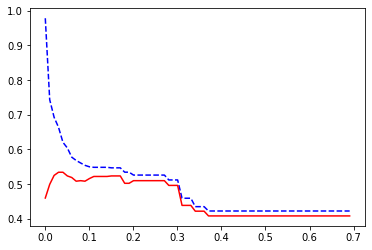

In [17]:
from arvore_decisao import plot_performance_min_samples

plot_performance_min_samples(x_treino, y_treino, x_teste, y_teste)

Escreva abaixo **um paragrafo** descrevendo o que pode ser visto no gráfico e quando há overfitting.

### Resposta:
`Analisando o gráfico obtido, pode-se notar uma alta variância até um min_sample de aproximadamente 0.05, o que indica um overfit no modelo com valores de min_sample inferiores a 0.05. Com um min_sample à partir de 0.4, já observa-se o efeito oposto, um alto viés ou alto bias, o que indica um underfit do modelo treinado.
Os valores ideais de min_sample para este modelo estão entre 0.05 e 0.3, pois é onde não há underfit ou overfit. O melhor valor seria algo próximo de 0.17 ou 0.18`

Atenção! Nesta nossa prática, variamos o parametro no teste para ver o impacto da variável `min_samples_split` no mesmo. Porém,  caso quisessems comparar este classificador com outro, **não devemos usar informação do teste para construir o classificador** pois o teste deve reproduzir "o mundo real" e não saberiamos os valores do teste a priori.  

Assim, não é metodologicamente correto escolher um parâmetro pelo teste. Para resolver esse problema, poderemos ter uma partição de validação. 


**Opcional**: Divida os dados em 60% de treino, 20% de validação e 20% de teste. Use a partição de validação para descobrir o melhor parametro `min_samples` (melhor=maior acurácia). Por meio dele, treine o modelo e calcule o resultado no teste. Além da acurácia, use a função [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) para exibir outras métricas de avaliação disponíveis no Scikit Learn.

**Opcional²** Como a qualidade pode ser encarada como uma nota em uma escala, modelar este problema como regressão pode ser melhor. Por isso, use [regressão e RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) e apresente o [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) obtido. Usando o treino e **validação** descubra o melhor valor para `min_samples_split`, apresente o grafico, e use o melhor parametro obtido na validação para o teste.